<h1>Capstone Project-The-Battle-of-Neighborhoods|<h1> <h2>Exploring Chennai, Tamil Nadu, India<h2>

![image.png](attachment:image.png)

<h1>1.1 Introduction: <h1>
<h3>Chennai, the capital city of Tamil Nadu- India, attracts many visitors either as tourists or as part of its large workforce. The vast majority claim Chennai is one of the best cities in India. We know that Chennai is popular for IIT and for being an IT and industrial hub. The city is also renowned for its passion for music. But, there’s more to the city than you think. From its varied culture and tradition, vibrant festivals, dainty delicacies to its quintessential “Chennai Tamil”, this city doesn’t fail to mesmerize the locals and the outsiders living here.  <h3>

<h2> 1.1. Business Problem: <h2>
    
<h3>The expectation of visitors to Chennai could be stated as follows:
    
a. What are the local food/ native cuisine available from restaurants in and around Chennai?
    
b. What services or value addition does the stop-over at a restaurant bring him, other than enjoying good food?
    
<h3>


<h2> 1.1 Target Audience: <h2>
<h3> 1.2.1 The goal of this exercise is to give a simple recommendation to visitors of Chennai, Tamil Nadu: in which area they will find a large number or concentration of which types of restaurants. 
    
    
1.2.2 The target audience are investors who would like to start a group or chain of restaurants in and around Chennai. This analysis will give an idea, which area is crowded with restaurants and where is it beneficial to open a restaurant around Chennai.
    
1.2.3 Road Travelers, to find reasonable refreshment joint where they can dine and also get along to refresh themselves in an amusement park – rest and refresh during their long road trip. <h3>

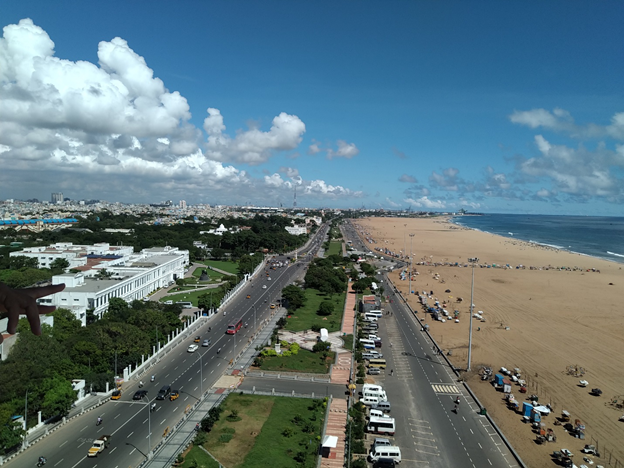

<h1> 2. Data <h1>
<h3> I will use foursquare API to collect data about restaurants in Chennai. I need data about different venues around Chennai. 
    
In order to gain that information we will use “Foursquare” locational information. Foursquare is a location data provider with information about all manner of venues and events within an area of interest. Such information includes venue names, locations, menus and even photos. As such, the foursquare location platform will be used as the sole data source since all the stated required information can be obtained through the API.

After finding the list of neighborhoods, we then connect to the Foursquare API to gather information about venues inside each and every neighborhood. 

The data retrieved from Foursquare contained information of venues within a specified distance of the longitude and latitude of the postcodes. 
    
Interactive maps are useful for data exploration and communicating research. Folium package will be used to:
    a. Create a map centered at an inputted location
    b. Create marker on the map
    
Markers can be extremely useful for storing information about locations on the map such as cross streets, building information, etc.


<h1> 3. Data Visualization and Exploration  <h1>

In [2]:
from pandas.io.json import json_normalize  
# tranform JSON file into a pandas dataframe

#import folium 
# map rendering library

# import k-means from clustering stage
from sklearn.cluster import KMeans

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

!pip install geopy
!pip install geocoder
!pip install folium

import numpy as np
import pandas as pd
import json
from geopy.geocoders import Nominatim
import geocoder
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize
from sklearn.metrics import silhouette_score

%matplotlib notebook

print('All libraries imported.')

     |████████████████████████████████| 102kB 7.2MB/s ta 0:00:011
     |████████████████████████████████| 102kB 6.2MB/s ta 0:00:011
All libraries imported.


<h3> 3.1. Using Nominatim to get co-ordinates of Chennai <h3>

In [3]:
address = 'Chennai,IN'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate are {}, {}.'.format(latitude, longitude))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


The geograpical coordinate are 13.0801721, 80.2838331.


In [4]:
neighborhood_latitude=13.0801721
neighborhood_longitude=80.2838331

In [5]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 3000 # define radius
CLIENT_ID = 'P1QGGY5V2CC1LI5S4CIO5LCZD43D2KBV1TLE2RVEHAU2NQMF' # your Foursquare ID
CLIENT_SECRET = 'CJUSKELRYX23BUREM3I03YHD0APWLR0QONPXV43XYW245EAA' # your Foursquare Secret
VERSION = '20180604'
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=P1QGGY5V2CC1LI5S4CIO5LCZD43D2KBV1TLE2RVEHAU2NQMF&client_secret=CJUSKELRYX23BUREM3I03YHD0APWLR0QONPXV43XYW245EAA&v=20180604&ll=13.0801721,80.2838331&radius=3000&limit=100'

In [6]:
results = requests.get(url).json()
#results

In [7]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [13]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

nearby_venues.head(100)

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.shape
nearby_venues.head()

,name,categories,lat,lng
0,National Durbar Hotel,Indian Restaurant,13.081301,80.270601
1,Fort Museum,Museum,13.080618,80.287719
2,M A Chidambaram Stadium,Cricket Ground,13.062830,80.279239
3,Kakada Ramprasad,Indian Restaurant,13.090415,80.279111
4,Bombay Lassi,Dessert Shop,13.066040,80.271222


<h3> 3.2. Visualizing near by venues using folium<h3>

In [14]:

map_chn = folium.Map(location=[latitude, longitude], zoom_start=15)

# add markers to map
for lat, lng, label in zip(nearby_venues['lat'], nearby_venues['lng'], nearby_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=3,
        radius=10,
        popup=label,
        color='blue',
        fill_color='#0f0f0f',
        fill_opacity=0.7,
    ).add_to(map_chn)  
    
map_chn

In [22]:
def getNearbyVenues(names, latitudes, longitudes):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
             CLIENT_ID, 
             CLIENT_SECRET, 
             VERSION, 
             lat, 
             lng, 
             radius, 
             LIMIT)
        
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [23]:
chennai_venues = getNearbyVenues(names=nearby_venues['name'],
                                 latitudes=nearby_venues['lat'],
                                 longitudes=nearby_venues['lng'])

National Durbar Hotel
Fort Museum
M A Chidambaram Stadium
Kakada Ramprasad
Bombay Lassi
Seena bhai tiffen centre
Mathura (woodland group)
Pasha
Ratna cafe
Nair Mess
French Loaf
Burma Bazaar
Cosmopolitan Club
Blend - The High Energy Bar
Hotel Buhari
Hotel Buhari
Taj Club House
Kasi Vinayaga Mess
Higginbothams
Higginbothams
Ramada Chennai Egmore
Flower Drum
Hotel Saravana Bhavan
Devi Cineplex
The Club House
Hotel Saravana Bhavan
Madras Hotel Ashoka Chennai
Fruit shop on greams road
A2B Triplicane
Ritche Street
Hotel Sangam
Croma
Parrys
Down Under
Mathsya
Albert Theatre
Kannagi Statue
Doveton Cafe
Domino's Pizza
Jawaharlal Nehru Stadium.
Domino's Pizza
Chennai Central Station
Hotel Saravana Bhavan
Saravana Stores
Evening bazaar
M.A.Ethirajulu Naidu
Thalapakatti
Chennai Central Platform No.2A
Chennai Central Platform # 1
MGR Memorial
Anjappar Chettinad
Chepauk Station
Hotel Shanthi
Chennai Central - Platform #1
Sea Lord Hotel
Lamcy cafe
Sangeetha restuarant
Triplicane Market
kabab center


In [24]:
print(chennai_venues.shape)
chennai_venues.head()

(5160, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,National Durbar Hotel,13.081301,80.270601,National Durbar Hotel,13.081301,80.270601,Indian Restaurant
1,National Durbar Hotel,13.081301,80.270601,Links,13.079986,80.254605,Snack Place
2,National Durbar Hotel,13.081301,80.270601,Bombay Lassi,13.066040,80.271222,Dessert Shop
3,National Durbar Hotel,13.081301,80.270601,Pasha,13.080774,80.272894,Nightclub
4,National Durbar Hotel,13.081301,80.270601,Mathura (woodland group),13.066640,80.269003,Indian Restaurant


In [25]:
# check how many venues were returned for each neighborhood

chennai_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
A2B Triplicane,100,100,100,100,100,100
Albert Theatre,100,100,100,100,100,100
Anjappar Chettinad,100,100,100,100,100,100
Blend - The High Energy Bar,82,82,82,82,82,82
Bombay Lassi,100,100,100,100,100,100
Burma Bazaar,32,32,32,32,32,32
Chennai Central - Platform #1,50,50,50,50,50,50
Chennai Central Platform # 1,92,92,92,92,92,92
Chennai Central Platform No.2A,94,94,94,94,94,94


In [26]:
# find out how many unique categories can be curated from all the returned venues

print('There are {} uniques categories.'.format(len(chennai_venues['Venue Category'].unique())))

There are 88 uniques categories.


In [27]:
# one hot encoding
Chennai_onehot = pd.get_dummies(chennai_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Chennai_onehot['Neighborhood'] = chennai_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Chennai_onehot.columns[-1]] + list(Chennai_onehot.columns[:-1])
Chennai_onehot = Chennai_onehot[fixed_columns]

Chennai_onehot.head()

,Neighborhood,African Restaurant,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Beach,Bengali Restaurant,Bistro,...,Spa,Steakhouse,Surf Spot,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Video Store
0,National Durbar Hotel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,National Durbar Hotel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,National Durbar Hotel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,National Durbar Hotel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,National Durbar Hotel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# examine the new dataframe size.

Chennai_onehot.shape

(5160, 89)

In [30]:
# group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

Chennai_grouped = Chennai_onehot.groupby('Neighborhood').mean().reset_index()
Chennai_grouped

,Neighborhood,African Restaurant,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Beach,Bengali Restaurant,Bistro,...,Spa,Steakhouse,Surf Spot,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Video Store
0,A2B Triplicane,0.010000,0.010000,0.010000,0.000000,0.000000,0.020000,0.030000,0.010000,0.010000,...,0.000000,0.000,0.000000,0.010000,0.010000,0.000000,0.000,0.000000,0.010000,0.000000
1,Albert Theatre,0.000000,0.010000,0.010000,0.000000,0.000000,0.010000,0.000000,0.010000,0.010000,...,0.000000,0.000,0.000000,0.000000,0.010000,0.010000,0.000,0.000000,0.000000,0.000000
2,Anjappar Chettinad,0.000000,0.000000,0.010000,0.000000,0.010000,0.020000,0.030000,0.000000,0.010000,...,0.000000,0.000,0.000000,0.010000,0.010000,0.000000,0.000,0.000000,0.020000,0.000000
3,Blend - The High Energy Bar,0.012195,0.012195,0.000000,0.000000,0.000000,0.036585,0.036585,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000000,0.012195,0.000,0.024390,0.024390,0.000000
4,Bombay Lassi,0.010000,0.010000,0.010000,0.010000,0.000000,0.020000,0.010000,0.010000,0.010000,...,0.000000,0.000,0.000000,0.010000,0.010000,0.010000,0.000,0.000000,0.010000,0.000000
5,Burma Bazaar,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.031250,0.000,0.000000,0.000000,0.000000,0.000000,0.000,0.062500,0.062500,0.031250
6,Chennai Central - Platform #1,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000,0.020000,0.040000,0.020000
7,Chennai Central Platform # 1,0.000000,0.000000,0.010870,0.000000,0.010870,0.010870,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.010870,0.000000,0.000,0.010870,0.032609,0.010870
8,Chennai Central Platform No.2A,0.000000,0.000000,0.010638,0.000000,0.010638,0.010638,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.010638,0.000000,0.000,0.010638,0.031915,0.010638
9,Chennai Central Station,0.000000,0.000000,0.010000,0.000000,0.010000,0.010000,0.010000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.010000,0.000000,0.000,0.010000,0.020000,0.010000


In [31]:
Chennai_grouped.shape

(54, 89)

In [33]:
num_top_venues = 10 # Top common venues needed
for hood in Chennai_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Chennai_grouped[Chennai_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue', 'freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending = False).reset_index(drop = True).head(num_top_venues))
    print('\n')

----A2B Triplicane----
                       venue  freq
0          Indian Restaurant  0.16
1                      Hotel  0.07
2                  Multiplex  0.05
3                  Juice Bar  0.05
4             Ice Cream Shop  0.04
5                       Café  0.04
6                 Restaurant  0.03
7              Movie Theater  0.03
8                      Beach  0.03
9  Middle Eastern Restaurant  0.03


----Albert Theatre----
                       venue  freq
0          Indian Restaurant  0.22
1                      Hotel  0.06
2             Sandwich Place  0.05
3         Italian Restaurant  0.04
4                  Multiplex  0.04
5             Ice Cream Shop  0.03
6                       Café  0.03
7                  Juice Bar  0.03
8  Middle Eastern Restaurant  0.03
9              Movie Theater  0.03


----Anjappar Chettinad----
                       venue  freq
0          Indian Restaurant  0.19
1                      Hotel  0.06
2                  Multiplex  0.05
3            

                       venue  freq
0          Indian Restaurant  0.21
1                      Hotel  0.06
2             Sandwich Place  0.04
3         Italian Restaurant  0.04
4                  Multiplex  0.04
5              Movie Theater  0.03
6  Middle Eastern Restaurant  0.03
7             Ice Cream Shop  0.03
8                       Café  0.03
9                  Juice Bar  0.03


----Higginbothams----
                venue  freq
0   Indian Restaurant  0.24
1               Hotel  0.07
2           Multiplex  0.04
3         Pizza Place  0.03
4                Café  0.03
5   Electronics Store  0.02
6      Clothing Store  0.02
7       Movie Theater  0.02
8           Juice Bar  0.02
9  Italian Restaurant  0.02


----Hotel Buhari----
                       venue  freq
0          Indian Restaurant  0.20
1                      Hotel  0.08
2                  Multiplex  0.04
3             Clothing Store  0.03
4             Sandwich Place  0.03
5              Movie Theater  0.03
6  Middle Easte

                       venue  freq
0          Indian Restaurant  0.15
1                      Hotel  0.06
2                  Juice Bar  0.05
3                  Multiplex  0.05
4                 Restaurant  0.04
5                       Café  0.04
6             Ice Cream Shop  0.03
7  Middle Eastern Restaurant  0.03
8              Movie Theater  0.03
9                      Beach  0.03


----Saravana Stores----
                  venue  freq
0     Indian Restaurant  0.22
1                 Hotel  0.05
2           Pizza Place  0.05
3                  Café  0.04
4        Sandwich Place  0.04
5        Ice Cream Shop  0.03
6  Fast Food Restaurant  0.03
7             Juice Bar  0.03
8    Italian Restaurant  0.03
9            Restaurant  0.02


----Sea Lord Hotel----
                       venue  freq
0          Indian Restaurant  0.16
1                      Hotel  0.08
2                  Multiplex  0.05
3             Ice Cream Shop  0.05
4                  Juice Bar  0.05
5                       

In [34]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending = False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [36]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighborhood'] = Chennai_grouped['Neighborhood']
for ind in np.arange(Chennai_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Chennai_grouped.iloc[ind, :], num_top_venues)
neighbourhoods_venues_sorted.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,A2B Triplicane,Indian Restaurant,Hotel,Juice Bar,Multiplex,Ice Cream Shop,Café,Beach,Middle Eastern Restaurant,Movie Theater,Restaurant
1,Albert Theatre,Indian Restaurant,Hotel,Sandwich Place,Multiplex,Italian Restaurant,Juice Bar,Middle Eastern Restaurant,Movie Theater,Café,Ice Cream Shop
2,Anjappar Chettinad,Indian Restaurant,Hotel,Multiplex,Restaurant,Middle Eastern Restaurant,Café,Movie Theater,Juice Bar,Beach,Electronics Store
3,Blend - The High Energy Bar,Indian Restaurant,Italian Restaurant,Multiplex,Hotel,Fast Food Restaurant,Sandwich Place,Platform,Beach,Bar,Café
4,Bombay Lassi,Indian Restaurant,Hotel,Multiplex,Ice Cream Shop,Café,Juice Bar,Middle Eastern Restaurant,Movie Theater,Sandwich Place,Italian Restaurant


In [37]:
Chennai_grouped_clustering = Chennai_grouped.drop('Neighborhood', 1)

In [38]:
# set number of clusters
kclusters = 5
# run k-means clustering
kmeans = KMeans(n_clusters = kclusters, random_state=0).fit(Chennai_grouped_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 3, 0, 1, 1, 4, 4, 4], dtype=int32)

In [48]:
# add clustering labels
#neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
chn_merged = nearby_venues
# match/merge SE London data with latitude/longitude for each neighborhood
chn_merged_latlong = chn_merged.join(neighbourhoods_venues_sorted.set_index('Neighborhood'), on = 'name')
chn_merged_latlong.head(5)

,name,categories,lat,lng,Cluster Labels1,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,National Durbar Hotel,Indian Restaurant,13.081301,80.270601,4,4,Indian Restaurant,Hotel,Pizza Place,Clothing Store,Sandwich Place,Middle Eastern Restaurant,Juice Bar,Bookstore,Movie Theater,Café
1,Fort Museum,Museum,13.080618,80.287719,1,1,Indian Restaurant,Platform,Vegetarian / Vegan Restaurant,Bookstore,Convenience Store,Nightclub,Museum,Movie Theater,Middle Eastern Restaurant,Memorial Site
2,M A Chidambaram Stadium,Cricket Ground,13.062830,80.279239,0,0,Indian Restaurant,Hotel,Multiplex,Movie Theater,Restaurant,Middle Eastern Restaurant,Pizza Place,Juice Bar,Beach,Café
3,Kakada Ramprasad,Indian Restaurant,13.090415,80.279111,1,1,Indian Restaurant,Platform,Vegetarian / Vegan Restaurant,Pizza Place,Convenience Store,Department Store,Farmers Market,Hotel,Video Store,Multiplex
4,Bombay Lassi,Dessert Shop,13.066040,80.271222,0,0,Indian Restaurant,Hotel,Multiplex,Ice Cream Shop,Café,Juice Bar,Middle Eastern Restaurant,Movie Theater,Sandwich Place,Italian Restaurant


In [60]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=14)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(chn_merged_latlong['lat'], chn_merged_latlong['lng'], chn_merged_latlong['categories'], chn_merged_latlong['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
display(map_clusters)

In [61]:
# Cluster 1
chn_merged_latlong.loc[chn_merged_latlong['Cluster Labels'] == 0, chn_merged_latlong.columns[[1] + list(range(5, chn_merged_latlong.shape[1]))]]

,categories,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Cricket Ground,0,Indian Restaurant,Hotel,Multiplex,Movie Theater,Restaurant,Middle Eastern Restaurant,Pizza Place,Juice Bar,Beach,Café
4,Dessert Shop,0,Indian Restaurant,Hotel,Multiplex,Ice Cream Shop,Café,Juice Bar,Middle Eastern Restaurant,Movie Theater,Sandwich Place,Italian Restaurant
6,Indian Restaurant,0,Indian Restaurant,Hotel,Multiplex,Café,Juice Bar,Ice Cream Shop,Middle Eastern Restaurant,Movie Theater,Sandwich Place,Italian Restaurant
8,Indian Restaurant,0,Indian Restaurant,Hotel,Juice Bar,Multiplex,Ice Cream Shop,Café,Restaurant,Sandwich Place,Movie Theater,Italian Restaurant
9,Indian Restaurant,0,Indian Restaurant,Hotel,Multiplex,Restaurant,Middle Eastern Restaurant,Café,Movie Theater,Beach,Juice Bar,Fast Food Restaurant
12,General Entertainment,0,Indian Restaurant,Hotel,Multiplex,Ice Cream Shop,Café,Juice Bar,Middle Eastern Restaurant,Movie Theater,Sandwich Place,Italian Restaurant
14,Indian Restaurant,0,Indian Restaurant,Hotel,Multiplex,Movie Theater,Clothing Store,Café,Middle Eastern Restaurant,Sandwich Place,Pizza Place,Juice Bar
15,Indian Restaurant,0,Indian Restaurant,Hotel,Multiplex,Movie Theater,Clothing Store,Café,Middle Eastern Restaurant,Sandwich Place,Pizza Place,Juice Bar
20,Hotel,0,Indian Restaurant,Hotel,Sandwich Place,Multiplex,Italian Restaurant,Juice Bar,Middle Eastern Restaurant,Movie Theater,Café,Clothing Store
21,Thai Restaurant,0,Indian Restaurant,Hotel,Italian Restaurant,Café,Ice Cream Shop,Middle Eastern Restaurant,Movie Theater,Multiplex,Sandwich Place,Juice Bar


In [62]:
# Cluster 2
chn_merged_latlong.loc[chn_merged_latlong['Cluster Labels'] == 1, chn_merged_latlong.columns[[1] + list(range(5, chn_merged_latlong.shape[1]))]]


,categories,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Museum,1,Indian Restaurant,Platform,Vegetarian / Vegan Restaurant,Bookstore,Convenience Store,Nightclub,Museum,Movie Theater,Middle Eastern Restaurant,Memorial Site
3,Indian Restaurant,1,Indian Restaurant,Platform,Vegetarian / Vegan Restaurant,Pizza Place,Convenience Store,Department Store,Farmers Market,Hotel,Video Store,Multiplex
5,Restaurant,1,Indian Restaurant,Platform,Hotel,Convenience Store,Pizza Place,Department Store,Farmers Market,Vegetarian / Vegan Restaurant,Video Store,Historic Site
11,Video Store,1,Indian Restaurant,Platform,Train Station,Hotel,Vegetarian / Vegan Restaurant,Convenience Store,Bookstore,Video Store,Restaurant,Furniture / Home Store
32,Market,1,Indian Restaurant,Platform,Train Station,Vegetarian / Vegan Restaurant,Convenience Store,Pizza Place,Department Store,Cricket Ground,Nightclub,Museum
44,Convenience Store,1,Indian Restaurant,Platform,Train Station,Bookstore,Convenience Store,Department Store,Pizza Place,Farmers Market,Vegetarian / Vegan Restaurant,Hotel
45,Furniture / Home Store,1,Indian Restaurant,Platform,Museum,Hotel,Bookstore,Convenience Store,Department Store,Pizza Place,Farmers Market,Vegetarian / Vegan Restaurant
46,Indian Restaurant,1,Indian Restaurant,Platform,Department Store,Convenience Store,Vegetarian / Vegan Restaurant,Pizza Place,Train Station,Ice Cream Shop,Hotel,Farmers Market
53,Platform,1,Indian Restaurant,Pizza Place,Platform,Farmers Market,Vegetarian / Vegan Restaurant,Hotel,Fast Food Restaurant,Italian Restaurant,Department Store,Convenience Store


In [63]:
# Cluster 3
chn_merged_latlong.loc[chn_merged_latlong['Cluster Labels'] == 2, chn_merged_latlong.columns[[1] + list(range(5, chn_merged_latlong.shape[1]))]]


,categories,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
58,Fast Food Restaurant,2,Platform,Indian Restaurant,Video Store,Museum,Restaurant,Sandwich Place,Fast Food Restaurant,Market,Furniture / Home Store,Electronics Store


In [64]:
# Cluster 4
chn_merged_latlong.loc[chn_merged_latlong['Cluster Labels'] == 3, chn_merged_latlong.columns[[1] + list(range(5, chn_merged_latlong.shape[1]))]]


,categories,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Bar,3,Indian Restaurant,Italian Restaurant,Multiplex,Hotel,Fast Food Restaurant,Sandwich Place,Platform,Beach,Bar,Café
16,Hotel,3,Indian Restaurant,Italian Restaurant,Multiplex,Hotel,Fast Food Restaurant,Sandwich Place,Platform,Beach,Bar,Café
17,Indian Restaurant,3,Indian Restaurant,Fast Food Restaurant,Multiplex,Bar,Beach,Platform,Ice Cream Shop,Train Station,Vegetarian / Vegan Restaurant,Café
24,Breakfast Spot,3,Indian Restaurant,Italian Restaurant,Multiplex,Hotel,Fast Food Restaurant,Sandwich Place,Platform,Beach,Bar,Café


In [65]:
# Cluster 5
chn_merged_latlong.loc[chn_merged_latlong['Cluster Labels'] == 4, chn_merged_latlong.columns[[1] + list(range(5, chn_merged_latlong.shape[1]))]]

,categories,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Indian Restaurant,4,Indian Restaurant,Hotel,Pizza Place,Clothing Store,Sandwich Place,Middle Eastern Restaurant,Juice Bar,Bookstore,Movie Theater,Café
7,Nightclub,4,Indian Restaurant,Hotel,Pizza Place,Clothing Store,Sandwich Place,Middle Eastern Restaurant,Bookstore,Movie Theater,Café,Multiplex
10,Sandwich Place,4,Indian Restaurant,Hotel,Pizza Place,Café,Platform,Fast Food Restaurant,Italian Restaurant,Sandwich Place,Middle Eastern Restaurant,Juice Bar
18,Bookstore,4,Indian Restaurant,Hotel,Multiplex,Café,Pizza Place,Movie Theater,Middle Eastern Restaurant,Juice Bar,Sandwich Place,Italian Restaurant
19,Bookstore,4,Indian Restaurant,Hotel,Multiplex,Café,Pizza Place,Movie Theater,Middle Eastern Restaurant,Juice Bar,Sandwich Place,Italian Restaurant
22,Indian Restaurant,4,Indian Restaurant,Hotel,Multiplex,Sandwich Place,Café,Movie Theater,Pizza Place,Platform,Middle Eastern Restaurant,Vegetarian / Vegan Restaurant
25,Vegetarian / Vegan Restaurant,4,Indian Restaurant,Hotel,Multiplex,Sandwich Place,Café,Movie Theater,Pizza Place,Platform,Middle Eastern Restaurant,Vegetarian / Vegan Restaurant
37,Indian Restaurant,4,Indian Restaurant,Hotel,Pizza Place,Café,Italian Restaurant,Sandwich Place,Fast Food Restaurant,Ice Cream Shop,Juice Bar,Vegetarian / Vegan Restaurant
38,Pizza Place,4,Indian Restaurant,Hotel,Italian Restaurant,Multiplex,Café,Ice Cream Shop,Sandwich Place,Juice Bar,Restaurant,Bookstore
39,Soccer Stadium,4,Indian Restaurant,Hotel,Pizza Place,Café,Platform,Bookstore,Vegetarian / Vegan Restaurant,Juice Bar,Museum,Seafood Restaurant


<h1> 4. Results <h1> 
 <h3> The following are the results that are derived based on the 5 clusters:
1. As discussed in the introduction, data also supports the fact that Chennai is famous for food and movie.
2. Although, the Clusters have variations, the most common venue is the Indian Restaurants.

<h1> 5. Discussion and Conclusion <h1>
 Visitors of Chennai can enjoy Indian cuisine in all the 5 clusters. If the visitor is interested in visiting other venues other than restaurant then cluster 3 is the best suited to enjoy movie with food.    